In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [68]:
data = pd.read_csv('stroke-data.csv')

In [69]:
data.head #head of dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
data.info() #info() of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [71]:
data.isnull().sum() #checking null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.bmi.head() 

In [73]:
data.bmi = data.bmi.fillna(data.bmi.mean(numeric_only=True)) #fillna with mean()

In [74]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [75]:
data.describe().T #describe()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<Axes: xlabel='gender', ylabel='count'>

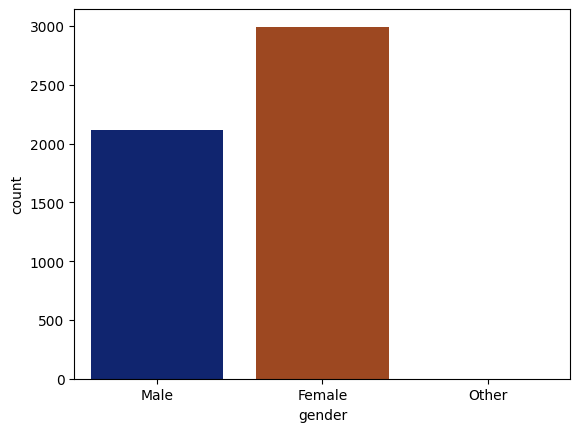

In [76]:
sns.countplot(x="gender",hue="gender",data=data,palette="dark")

In [77]:
print(data[data['gender'] == "Other"])

         id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  


In [78]:
data.drop(labels = 3116, axis=0, inplace=True)

<Axes: xlabel='gender', ylabel='count'>

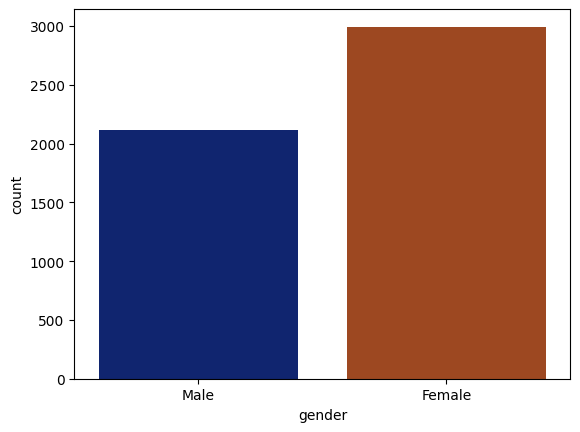

In [79]:
sns.countplot(x="gender",hue="gender",data=data,palette="dark")

<Axes: xlabel='ever_married', ylabel='count'>

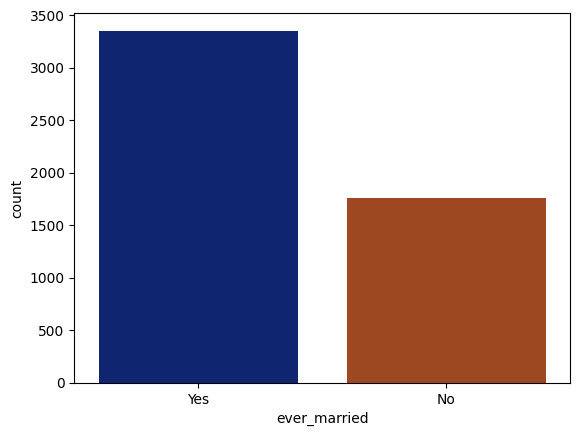

In [80]:
sns.countplot(x="ever_married",hue="ever_married",data=data,palette="dark")

<Axes: xlabel='work_type', ylabel='count'>

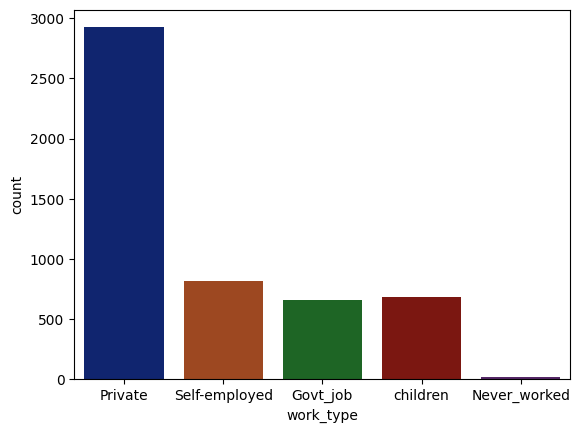

In [81]:
sns.countplot(x="work_type",hue="work_type",data=data,palette="dark")

In [82]:
print(data[data['work_type'] == "Never_worked"].count())

id                   22
gender               22
age                  22
hypertension         22
heart_disease        22
ever_married         22
work_type            22
Residence_type       22
avg_glucose_level    22
bmi                  22
smoking_status       22
stroke               22
dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

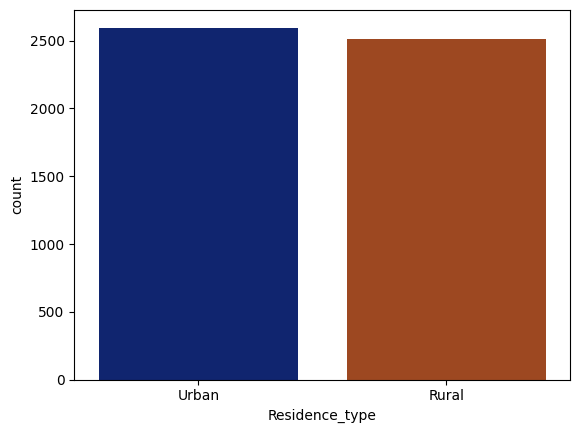

In [83]:
sns.countplot(x="Residence_type",hue="Residence_type",data=data,palette="dark")

<Axes: xlabel='smoking_status', ylabel='count'>

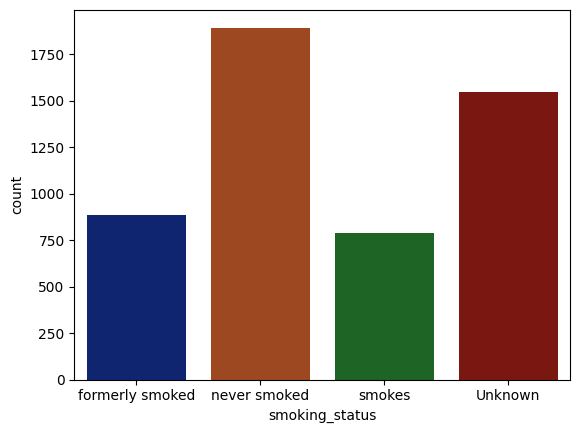

In [84]:
sns.countplot(x="smoking_status",hue="smoking_status",data=data,palette="dark")

In [85]:
data.replace("Unknown", np.nan, inplace=True)

In [86]:
print(data[data.smoking_status=="Unknown"])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [87]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [88]:
smoking_status_mode = data['smoking_status'].mode()

In [89]:
print(smoking_status_mode)

0    never smoked
Name: smoking_status, dtype: object


In [94]:
data['smoking_status'].fillna(data['smoking_status'].mode()[0],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6088\1914916434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['smoking_status'].fillna(data['smoking_status'].mode()[0],inplace=True)


In [95]:
data['smoking_status'].head(200)

0      formerly smoked
1         never smoked
2         never smoked
3               smokes
4         never smoked
            ...       
195    formerly smoked
196    formerly smoked
197       never smoked
198    formerly smoked
199       never smoked
Name: smoking_status, Length: 200, dtype: object

In [96]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [97]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [98]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [99]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["gender","ever_married","work_type","Residence_type","smoking_status"]]=oe.fit_transform(data[["gender","ever_married","work_type","Residence_type","smoking_status"]])


In [100]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,0.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,1.0,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,1.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,2.0,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,1.0,1


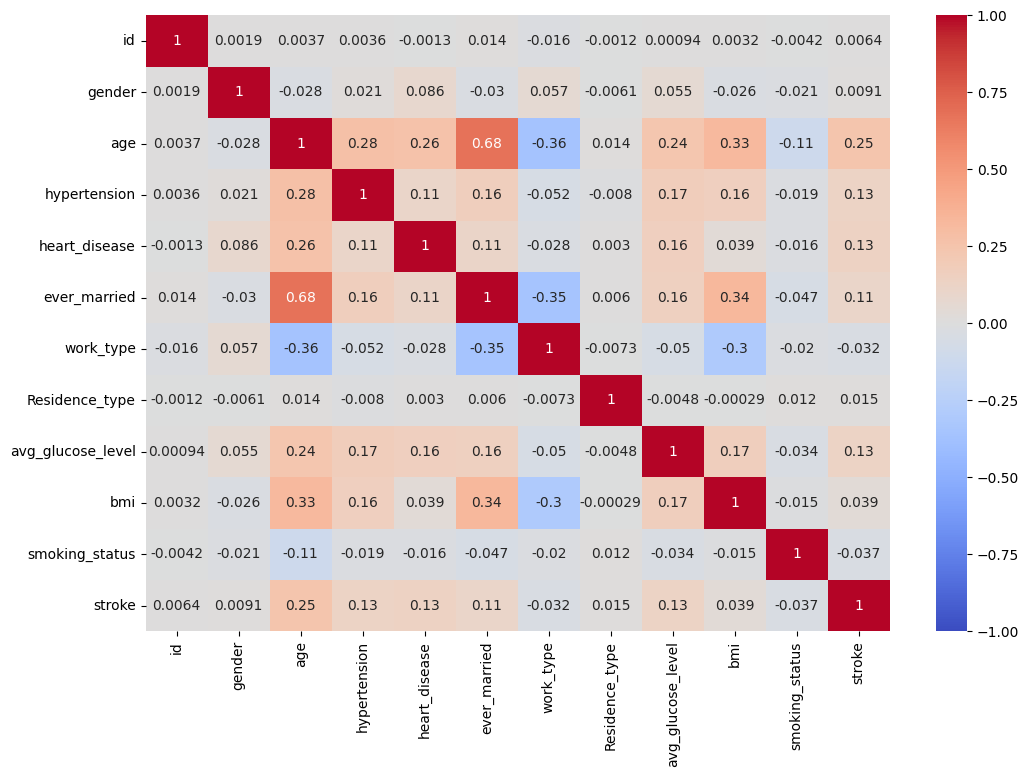

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [103]:
# Feature importance
X = data.drop(columns=["stroke"])
y = data['stroke']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [107]:
#Define Base Learner (Weak Model)
base_model = DecisionTreeClassifier(random_state=42)

In [108]:
#Define AdaBoost Model
ada = AdaBoostClassifier(
    estimator=base_model,
    random_state=42
)

In [114]:
#Hyperparameter Grid
param_grid = {
    "n_estimators": [50,100,200],
    "learning_rate": [0.01, 0.1, 1.0],
    "estimator__max_depth": [1, 2, 3],
    "estimator__min_samples_leaf": [1, 3, 5]
}

In [115]:
#GridSearchCV
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

,estimator,AdaBoostClass...ndom_state=42)
,param_grid,"{'estimator__max_depth': [1, 2, ...], 'estimator__min_samples_leaf': [1, 3, ...], 'learning_rate': [0.01, 0.1, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [116]:
print("Best Parameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Best Parameters:
{'estimator__max_depth': 1, 'estimator__min_samples_leaf': 1, 'learning_rate': 0.01, 'n_estimators': 50}


In [117]:
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9510763209393346

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



C:\Users\hp\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [118]:
# Default AdaBoo# Default AdaBoost model
default_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)

In [119]:
# Train
default_model.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [120]:
# Predict
y_pred_default = default_model.predict(X_test)

# Accuracy
default_accuracy = accuracy_score(y_test, y_pred_default)
print("Before Tuning Accuracy:", default_accuracy)

Before Tuning Accuracy: 0.9041095890410958
